<a href="https://colab.research.google.com/github/IlyaNechaev27/DS_project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [19]:
!git clone https://github.com/IlyaNechaev27/DS_project.git

fatal: destination path 'DS_project' already exists and is not an empty directory.


In [26]:
df = pd.read_csv("DS_project/data/shootings.csv")


Проверим, все ли нормально считалось – посмотрим на первые 5 строк

In [27]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


*Размер данных*

In [28]:
print(df.shape)

(4895, 15)


*Название признаков*

In [29]:
print(df.columns.values)

['id' 'name' 'date' 'manner_of_death' 'armed' 'age' 'gender' 'race' 'city'
 'state' 'signs_of_mental_illness' 'threat_level' 'flee' 'body_camera'
 'arms_category']


In [30]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,Hispanic,Chandler,AZ,False,attack,Car,False,Guns
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,White,Burlington,IA,False,other,Not fleeing,True,Unarmed
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,Black,Knoxville,PA,False,attack,Not fleeing,False,Other unusual objects


In [37]:
df['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

Описание признаков

|  Название  | Описание | Тип |
|---         |--:       |     |
| **id** | идентификтор | количественный |
| **name** | Имя застреленного человека | строковой |
| **date** | Дата события | дата, формата yyyy-mm-dd format  |
| **manner_of_death** | Каким способом было произведено убийство | строковой |
| **armed** | Вооружение | строковый |
| **age** | Возраст расстрелянного человека | количественный |
| **gender** | Пол расстрелянного человека | качественный
| **race** | Расса растрялянного человека |
| **city** | Город происшествия | строковой |
| **state** |  Штат происшествия | строковой |
| **signs_of_mental_illness** | Признаки психический заболеваний | булевый |
| **threat_level** | Уровень угрозы | строковой |
| **flee** | |
| **body_camera** | Наличие видеокамеры, заснявшей происшествие | булевое |
| **arms_category** | Категория орежия | строковой |

Целевая переменная: **Race** – раса убитого полицией человека, строкой. Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым. 


In [41]:
df['race'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

Text(0.5, 1.0, 'Распределений по расам людей, убитых полицией')

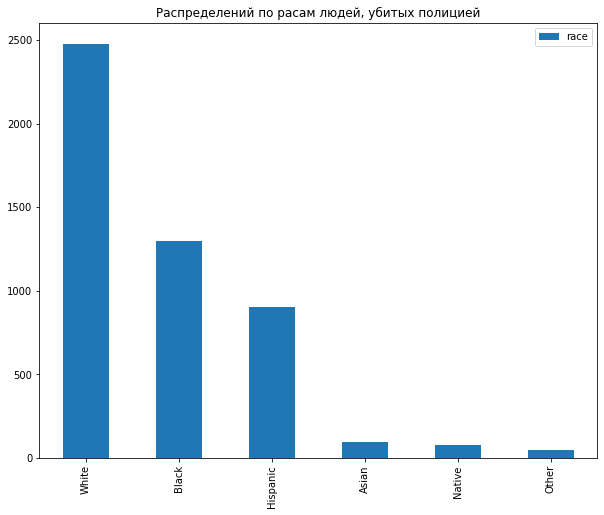

In [47]:
df['race'].value_counts().plot(kind='bar', label='race')
plt.title("Распределений по расам людей, убитых полицией")

Text(0.5, 1.0, 'Распределений по полу')

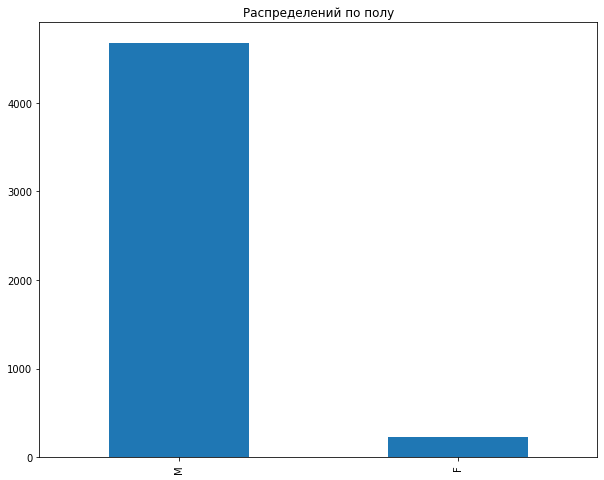

In [50]:
df['gender'].value_counts().plot(kind='bar', label='race')
plt.title("Распределений по полу")

In [53]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

In [55]:
def state(x):
    if x=='AL':
        return('Alabama')
    elif x=='AK':
        return('Alaska')
    elif x=='AZ':
        return('Arizona')
    elif x=='AR':
        return('Arkansas')
    elif x=='AZ':
        return('Arizona')
    elif x=='CA':
        return('California')
    elif x=='CO':
        return('Colorado')
    elif x=='CT':
        return('Connecticut')
    elif x=='DE':
        return('Delaware')
    elif x=='FL':
        return('Florida')
    elif x=='GE':
        return('Georgia')
    elif x=='HI':
        return('Hawaii')
    elif x=='FL':
        return('Idaho')
    elif x=='IL':
        return('Illinois')
    elif x=='IN':
        return('Indiana')
    elif x=='IA':
        return('Iowa')
    elif x=='KS':
        return('Kansas')
    elif x=='KY':
        return('Kentucky')
    elif x=='LA':
        return('Louisiana')
    elif x=='ME':
        return('Maine')
    elif x=='MD':
        return('Maryland')
    elif x=='MA':
        return('Massachusetts')
    elif x=='MI':
        return('Michigan')
    elif x=='MN':
        return('Minnesota')
    elif x=='MS':
        return('Mississippi')
    elif x=='MO':
        return('Missouri')
    elif x=='MT':
        return('Montana')
    elif x=='NE':
        return('Nebraska')
    elif x=='NV':
        return('Nevada')
    elif x=='NH':
        return('New Hampshire')
    elif x=='NJ':
        return('New Jersey')
    elif x=='NM':
        return('New Mexico')
    elif x=='NY':
        return('New York')
    elif x=='NC':
        return('North Carolina')
    elif x=='ND':
        return('North Dakota')
    elif x=='OH':
        return('Ohio')
    elif x=='OK':
        return('Oklahoma')
    elif x=='OR':
        return('Oregon')
    elif x=='PA':
        return('Pennsylvania')
    elif x=='RI':
        return('Rhode Island')
    elif x=='SC':
        return('South Carolina')
    elif x=='SD':
        return('South Dakota')
    elif x=='TN':
        return('Tennessee')
    elif x=='TX':
        return('Texas')
    elif x=='UT':
        return('Utah')
    elif x=='VT':
        return('Vermont')
    elif x=='VA':
        return('Virginia')
    elif x=='WA':
        return('Washington')
    elif x=='WV':
        return('West Virginia')
    elif x=='WI':
        return('Wisconsin')
    else:
        return('Wyoming')
    

In [57]:
df['state'] = df['state'].apply(state)

In [58]:
df['state'].unique()

array(['Washington', 'Oregon', 'Kansas', 'California', 'Colorado',
       'Oklahoma', 'Arizona', 'Iowa', 'Pennsylvania', 'Texas', 'Ohio',
       'Louisiana', 'Montana', 'Utah', 'Arkansas', 'Illinois', 'Nevada',
       'New Mexico', 'Minnesota', 'Missouri', 'Virginia', 'New Jersey',
       'Indiana', 'Kentucky', 'Massachusetts', 'New Hampshire', 'Florida',
       'Wyoming', 'Maryland', 'Nebraska', 'Michigan', 'Tennessee',
       'North Carolina', 'Alaska', 'New York', 'Maine', 'Alabama',
       'Mississippi', 'Wisconsin', 'South Carolina', 'Delaware',
       'West Virginia', 'Hawaii', 'North Dakota', 'Connecticut',
       'South Dakota', 'Vermont', 'Rhode Island'], dtype=object)

In [61]:
def Region(x):
    if x=='Alabama':
        return('south')
    elif x=='Alaska':
        return('west')
    elif x=='Arizona':
        return('west')
    elif x=='Arkansas':
        return('south')

    elif x=='California':
        return('west')
    
    elif x=='Colorado':
        return('west')
    
    elif x=='Connecticut':
        return('northeast')
    
    elif x=='Delaware':
        return('south')
    
    elif x=='Florida':
        return('south')
    elif x=='Georgia':
        return('south')
    elif x=='Hawaii':
        return('west')
    elif x=='Idaho':
        return('west')
    elif x=='Illinois':
        return('Midwest')
    elif x=='Indiana':
        return('Midwest')
    elif x=='Iowa':
        return('Midwest')
    elif x=='Kansas':
        return('Midwest')
    elif x=='Kentucky':
        return('south')
    elif x=='Louisiana':
        return('south')
    elif x=='Maine':
        return('northeast')
    elif x=='Maryland':
        return('south')
    elif x=='Massachusetts':
        return('northeast')
    elif x=='Michigan':
        return('Midwest')
    elif x=='Minnesota':
        return('Midwest')
    elif x=='Mississippi':
        return('south')
    elif x=='Missouri':
        return('Midwest')
    elif x=='Montana':
        return('west')
    elif x=='Nebraska':
        return('Midwest')
    elif x=='Nevada':
        return('west')
    elif x=='New Hampshire':
        return('northeast')
    elif x=='New Jersey':
        return('northeast')
    elif x=='New Mexico':
        return('west')
    elif x=='New York':
        return('northeast')
    elif x=='North Carolina':
        return('south')
    elif x=='North Dakota':
        return('Midwest')
    elif x=='Ohio':
        return('Midwest')
    elif x=='Oklahoma':
        return('south')
    elif x=='Oregon':
        return('west')
    elif x=='Pennsylvania':
        return('northeast')
    elif x=='Rhode Island':
        return('northeast')
    elif x=='South Carolina':
        return('south')
    elif x=='South Dakota':
        return('Midwest')
    elif x=='Tennessee':
        return('south')
    elif x=='Texas':
        return('south')
    elif x=='Utah':
        return('west')
    elif x=='Vermont':
        return('northeast')
    elif x=='Virginia':
        return('south')
    elif x=='Washington':
        return('west')
    elif x=='West Virginia':
        return('south')
    elif x=='Wisconsin':
        return('Midwest')
    elif x=='Wyoming':
        return('west')
    

In [62]:
df['region']=df['state'].apply(Region)

In [65]:
df['region'].unique()

array(['west', 'Midwest', 'south', 'northeast'], dtype=object)

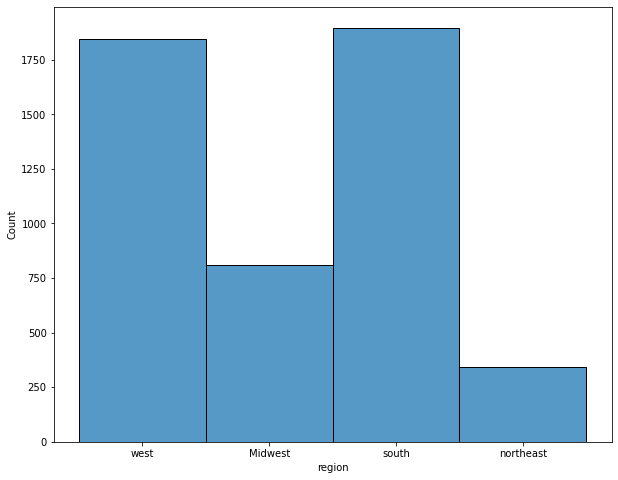

In [67]:
sns.histplot(df['region'])

In [70]:
df['region'].isnull().sum()

0

In [71]:
df['race'].unique()

array(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Native'],
      dtype=object)

In [73]:
df['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

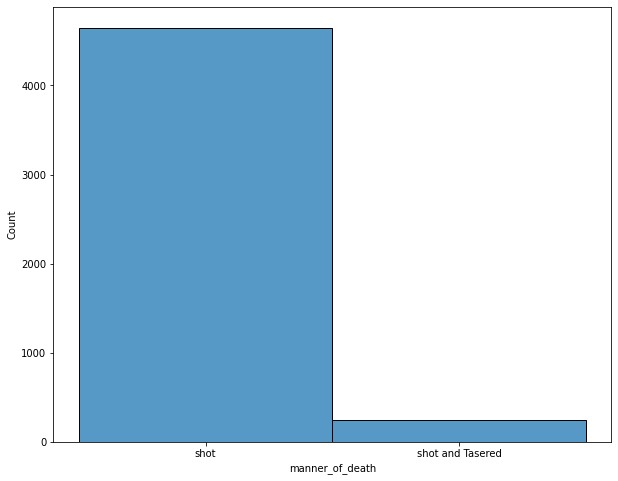

In [74]:
sns.histplot(df['manner_of_death'])

In [75]:
df['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [84]:
def year(x):
    return x.split('-')[0]

In [85]:
df['year'] = df['date'].apply(year)

In [86]:
df['year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [87]:
df['year'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020'], dtype=object)

In [88]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,region,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,True,attack,Not fleeing,False,Guns,west,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,False,attack,Not fleeing,False,Guns,west,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,Kansas,False,other,Not fleeing,False,Unarmed,Midwest,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,California,True,attack,Not fleeing,False,Other unusual objects,west,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,Colorado,False,attack,Not fleeing,False,Piercing objects,west,2015


In [89]:
def month(x):
  return x.split('-')[1]

In [90]:
df['month'] = df['date'].apply(month)

In [91]:
df['month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [93]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,region,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,True,attack,Not fleeing,False,Guns,west,2015,01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,False,attack,Not fleeing,False,Guns,west,2015,01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,Kansas,False,other,Not fleeing,False,Unarmed,Midwest,2015,01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,California,True,attack,Not fleeing,False,Other unusual objects,west,2015,01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,Colorado,False,attack,Not fleeing,False,Piercing objects,west,2015,01


In [94]:
def quarter(x):
    if x <= 3:
        return(1)
    elif x <=6:
        return(2)
    elif x <= 9:
        return(3)
    else:
        return(4) 

In [95]:
df['month']=df['month'].astype(int)

In [98]:
df['quarter'] = df['month'].apply(quarter)

In [99]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,region,year,month,quarter
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,Washington,True,attack,Not fleeing,False,Guns,west,2015,1,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,Oregon,False,attack,Not fleeing,False,Guns,west,2015,1,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,Kansas,False,other,Not fleeing,False,Unarmed,Midwest,2015,1,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,California,True,attack,Not fleeing,False,Other unusual objects,west,2015,1,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,Colorado,False,attack,Not fleeing,False,Piercing objects,west,2015,1,1
